#Demonstration: MNIST Classification with CNN and Filter Analysis

##Scenario:
- A deep learning engineer is tasked with building a simple yet interpretable CNN model to classify handwritten digits from the MNIST dataset. Beyond achieving good accuracy, the goal is to visualize learned filters and feature maps to provide transparency into the model's inner workings—bridging performance with explainability.

##Import Libraries

In [78]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers, models

##Load the MNIST Dataset

In [50]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [51]:
print("Training data shape:", train_images.shape)
print("Test data shape:", test_images.shape)

Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


## Reshape and normalize the images

In [52]:
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1)).astype('float32') / 255

##ONe-hot encode Labels

In [53]:
from tensorflow.keras.utils import to_categorical

train_labels_cat = to_categorical(train_labels, 10)
test_labels_cat = to_categorical(test_labels, 10)

## Visualize an example image

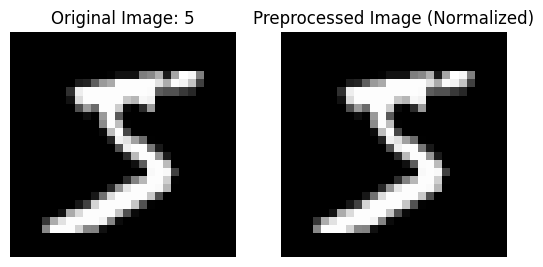

In [54]:
plt.subplot(1, 2, 1)
plt.imshow(train_images[0].reshape(28, 28), cmap='gray')
plt.title(f"Original Image: {train_labels[0]}")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(train_images[0].reshape(28, 28), cmap='gray')
plt.title("Preprocessed Image (Normalized)")
plt.axis('off')
plt.show()

##Build a Basic CNN Architecture

In [55]:
# Define the CNN model
original_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

_ = original_model(tf.keras.Input(shape=(28, 28, 1)))

# Display the model summary
original_model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

##Model Compilation

In [56]:
original_model.compile(optimizer='adam',
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

##Model Training

In [57]:
history = original_model.fit(train_images, train_labels_cat,
                             epochs=5,
                             batch_size=64,
                             validation_split=0.2)

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 43s 54ms/step - accuracy: 0.8605 - loss: 0.4677 - val_accuracy: 0.9780 - val_loss: 0.0770
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 42s 56ms/step - accuracy: 0.9801 - loss: 0.0618 - val_accuracy: 0.9859 - val_loss: 0.0482
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 81s 55ms/step - accuracy: 0.9870 - loss: 0.0412 - val_accuracy: 0.9861 - val_loss: 0.0488
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 46s 61ms/step - accuracy: 0.9905 - loss: 0.0294 - val_accuracy: 0.9889 - val_loss: 0.0379
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 77s 54ms/step - accuracy: 0.9936 - loss: 0.0215 - val_accuracy: 0.9864 - val_loss: 0.0482


##Evaluate Model

In [58]:
test_loss, test_acc = original_model.evaluate(test_images, test_labels_cat)
print(f"Test Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9850 - loss: 0.0503
Test Accuracy: 0.9883


##Apply Convolutional Operations and Visualize Filters

### Get the filters from the first Conv2D layer

In [59]:
filters, biases = original_model.layers[0].get_weights()

## Visualize the first filter

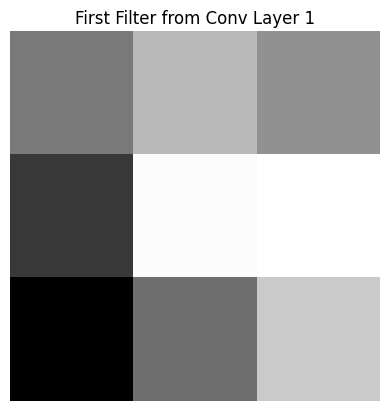

In [60]:
plt.imshow(filters[:, :, 0, 0], cmap='gray')
plt.title('First Filter from Conv Layer 1')
plt.axis('off')
plt.show()

## Perform convolution on the first image in the dataset

In [61]:
inputs = original_model.input
conv_output = original_model.layers[0](inputs) # Directly apply the first layer to the input
conv_model = tf.keras.models.Model(inputs=inputs, outputs=conv_output)

In [62]:
conv_feature_map = conv_model.predict(train_images[0].reshape(1, 28, 28, 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


## Visualize the feature maps

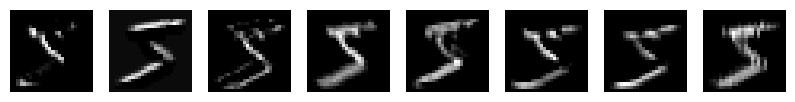

In [63]:
plt.figure(figsize=(10, 10))
for i in range(min(8, conv_feature_map.shape[-1])):  # Visualizing first 8 feature maps
    plt.subplot(4, 8, i + 1)
    plt.imshow(conv_feature_map[0, :, :, i], cmap='gray')
    plt.axis('off')
plt.show()

##Apply Max and Average Pooling

In [64]:
max_pooling_layer = layers.MaxPooling2D((2, 2))
max_pooled = max_pooling_layer(train_images[0].reshape(1, 28, 28, 1))

## Compare original image vs max pooled image

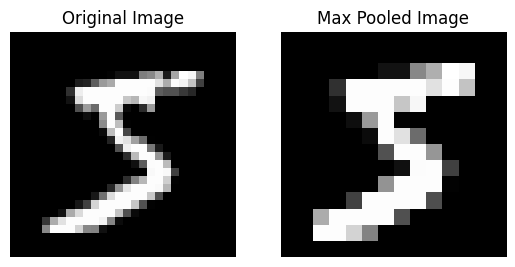

In [65]:
plt.subplot(1, 2, 1)
plt.imshow(train_images[0].reshape(28, 28), cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(tf.reshape(max_pooled[0], (14, 14)), cmap='gray')
plt.title('Max Pooled Image')
plt.axis('off')
plt.show()

##Average Pooling

In [66]:
avg_pooling_layer = layers.AvgPool2D((2, 2))
avg_pooled = avg_pooling_layer(train_images[0].reshape(1, 28, 28, 1))

### Compare original image vs average pooled image

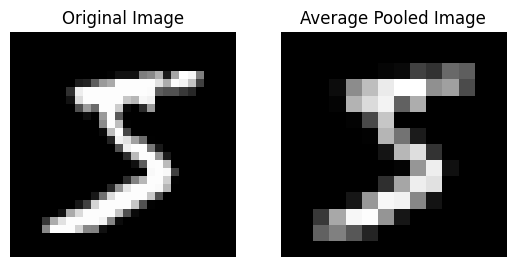

In [67]:
plt.subplot(1, 2, 1)
plt.imshow(train_images[0].reshape(28, 28), cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(avg_pooled[0].numpy().reshape(14, 14), cmap='gray')
plt.title('Average Pooled Image')
plt.axis('off')
plt.show()

##Apply Global Pooling

In [68]:
global_pooling_layer = layers.GlobalAveragePooling2D()
global_pooled = global_pooling_layer(train_images[0].reshape(1, 28, 28, 1))

print(f"Global pooled result: {global_pooled}")

Global pooled result: [[0.13768007]]


## Create a new model to get the outputs from convolutional layers

In [71]:
conv_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))
])
conv_model.layers[0].set_weights(original_model.layers[0].get_weights())

## Get feature maps for the first image

In [72]:
feature_map = conv_model.predict(np.expand_dims(train_images[0], axis=0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step



## Plot the feature maps

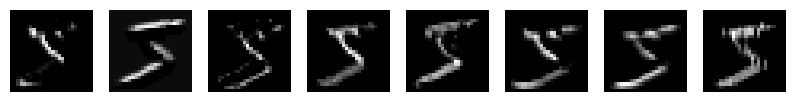

In [73]:
plt.figure(figsize=(10, 10))
for i in range(min(8, feature_map.shape[-1])):  # Loop through first 8 channels
    plt.subplot(4, 8, i + 1)
    plt.imshow(feature_map[0, :, :, i], cmap='gray')
    plt.axis('off')
plt.show()

##Normalize and Apply Image Augmentation

In [74]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Define the ImageDataGenerator for augmentation

In [75]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

## Fit the generator on the training images

In [76]:
datagen.fit(train_images)

## Display an augmented image

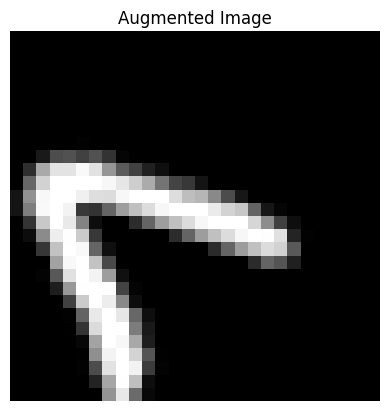

In [77]:
for augmented_image in datagen.flow(train_images, train_labels, batch_size=1):
    plt.imshow(augmented_image[0].reshape(28, 28), cmap='gray')
    plt.title('Augmented Image')
    plt.axis('off')
    plt.show()
    break